# Support Vector Regression (SVR)

## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

In [2]:
dataset = pd.read_csv("Position_Salaries.csv")
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [3]:
X = dataset.iloc[:,1].values
y = dataset.iloc[:,-1].values
X = X.reshape(len(X),1)
y = y.reshape(len(y),1)

In [4]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [5]:
y

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]])

## Feature Scaling
* Note that in SVR we need to apply feature scaling  
* in **SVR model**, there is **no explicit equation** of the dependent variable with respect to the features
* **SVR model** has an **implicit equation** of dependent variable with respect to features and hence we need to do feature scaling
* Feature scaling in SVR model, needs to  be **done for both features as well as independent variables** since the dependent variable is not just binar values.
* Also note that, When implementing Linear regression through sklearn, feature scaling was not performed

In [6]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler() # sc --> scalar class for x - instance of StandardScaler() class
X = sc_X.fit_transform(X)
# we need to create two separate instance of StandardScaler class 
# one for X and the other for y, this is due to the fact that X and y do not have same mean and standard deviation.
# if we try to apply sc_x to y variable, then the mean and sd from feature matrix is used to scale the value of 
# dependent variable
# which is not the right way ofcourse.
sc_y =  StandardScaler()
y = sc_y.fit_transform(y)

In [7]:
X

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [8]:
y

array([[-0.72004253],
       [-0.70243757],
       [-0.66722767],
       [-0.59680786],
       [-0.49117815],
       [-0.35033854],
       [-0.17428902],
       [ 0.17781001],
       [ 0.88200808],
       [ 2.64250325]])

## Training the SVR model on the whole dataset
* **no need for test/train split**, similar to polynomial regression
* we want to leverage the **maximum data to learn the correlation** between features and dependent variable
* importing SVR class from svm module 

In [9]:
from sklearn.svm import SVR 
regressor = SVR(kernel = 'rbf') # we need to choose which kernel. since this is a non-linear data we choose radial basis function kernel
# there are lot more of other kernels available 
regressor.fit(X,y)

/home/hari-cms/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVR()

## Predicting a new result

In [10]:
sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]]))) # this will predict the salary with in the scaled form of y 
# and therefore we need to reverse the scaling back to its original values 

array([170370.0204065])

## Visualising the SVR results

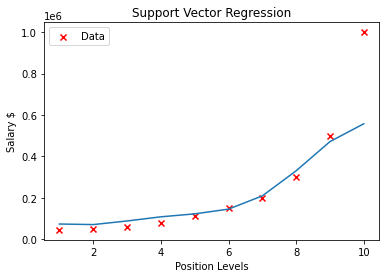

In [11]:
plt.scatter(sc_X.inverse_transform(X),sc_y.inverse_transform(y),marker = 'x', c='r',label = 'Data')
plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform(regressor.predict(X)))
plt.title("Support Vector Regression")
plt.xlabel("Position Levels")
plt.ylabel("Salary $")
plt.legend()
plt.show()